
Mochammad Hazmi Cokro Mandiri
> Dataset Rock Paper Scissors



**Library**

In [ ]:
# Library u/ ekstrak dan atur lokasi 
import zipfile
import os

# Library u/ machine learning Tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Library u/  upload file gcolabs dan plot
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**Download Dataset Rock Paper Scissors**

In [ ]:
# Download dataset menggunakan wget
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-07-20 21:46:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.24MB/s    in 52s     

2020-07-20 21:47:50 (5.92 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



**Unzip / Ekstrak Dataset**

In [ ]:
# Ekstrak file tipe zip
ekstrak_zip = 'rockpaperscissors.zip'
out_zip = zipfile.ZipFile(ekstrak_zip, 'r')
out_zip.extractall('/dataset')
out_zip.close()

**Atur Lokasi Dataset RockPaperScissors**

In [ ]:
# Mengatur Lokasi dataset yang akan digunakan
dir_dataset = "/dataset/rockpaperscissors/rps-cv-images"
dir_paper = os.path.join("/dataset/rockpaperscissors/rps-cv-images/paper")
dir_rock = os.path.join("/dataset/rockpaperscissors/rps-cv-images/rock")
dir_scissors = os.path.join("/dataset/rockpaperscissors/rps-cv-images/scissors")

In [ ]:
# Mengecek jumlah data rock paper scissor
total_paper = len(os.listdir(dir_paper))
total_rock = len(os.listdir(dir_rock))
total_scissors = len(os.listdir(dir_scissors))

# Mencetak jumlah data rock paper scissor
print("Total Data Paper Image      : ",total_paper)
print("Total Data Rock Image       : ",total_rock)
print("Total Data Scissors Image  : ",total_scissors)

Total Data Paper Image      :  712
Total Data Rock Image       :  726
Total Data Scissors Image  :  750


**Implementasi Image Data Generator Tensorflow untuk pengolahan gambar**

In [ ]:
# Pembuatan Train dan Validation  data generator 
# Untuk augmentasi gambar

#Ukuran validation 40% dari dataset
val_size = 0.4

Train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

Validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

**Split Dataset -> Train dan Validation | Ukuran Validasi 40 %**

In [ ]:
# Hasil split dataset dengan 
# Train : 1314 | Validation :  874

# Mengatur lebar dan tinggi gambar
img_width = 150
img_height = 150

# Train dan Validation generator  dengan mode categorical
Train_generator = Train_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = True,
    subset = "training"
)

Validation_generator = Validation_datagen.flow_from_directory(
    dir_dataset,
    target_size = (img_width,img_height),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 16,
    shuffle = False,
    subset = "validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Model Sequential + Dropout Regularization**

In [ ]:
# Pembuatan Model dengan tipe Sequential

Model = Sequential(
    [
     # Activation menggunakan relu + softmax
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (img_width,img_height,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),

     # Droupout
     Dropout(0.2),
     
     Dense(128, activation = 'relu'),
     Dense(3, activation='softmax')
    ]
)

**Model Compile menggunakan Optimizer**

In [ ]:
# Penggunaan Optimizer 'Adam' dengan learning rate 0.00146
Adam(learning_rate=0.00146, name='Adam')
Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

**Proses Training Dataset + Penggunaan Callbacks**

In [ ]:
# Proses Training 
batch_size = 16

# Mengatur Jumlah Validation Steps
Validation_steps = Validation_generator.samples / Validation_generator.batch_size -1

# Penggunaan Callbacks dengan fungsi EarlyStopping dengan memonitoring Val_Loss
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience = 3,
    verbose = 1,
    mode = 'auto'
)

Model.fit_generator(
    Train_generator,
    steps_per_epoch = 50,
    epochs = 25,
    verbose = 1,
    validation_data = Validation_generator,
    validation_steps = Validation_steps,
    callbacks=[callback]
)

Epoch 1/25
50/50 [==============================] - 54s 1s/step - loss: 1.1163 - accuracy: 0.3804 - val_loss: 1.0284 - val_accuracy: 0.5058
Epoch 2/25
50/50 [==============================] - 53s 1s/step - loss: 0.8769 - accuracy: 0.6145 - val_loss: 0.7363 - val_accuracy: 0.6898
Epoch 3/25
50/50 [==============================] - 58s 1s/step - loss: 0.5998 - accuracy: 0.7875 - val_loss: 0.6577 - val_accuracy: 0.7512
Epoch 4/25
50/50 [==============================] - 53s 1s/step - loss: 0.4735 - accuracy: 0.8244 - val_loss: 0.3831 - val_accuracy: 0.8669
Epoch 5/25
50/50 [==============================] - 54s 1s/step - loss: 0.3652 - accuracy: 0.8715 - val_loss: 0.2687 - val_accuracy: 0.9062
Epoch 6/25
50/50 [==============================] - 55s 1s/step - loss: 0.2372 - accuracy: 0.9211 - val_loss: 0.2572 - val_accuracy: 0.9086
Epoch 7/25
50/50 [==============================] - 54s 1s/step - loss: 0.2304 - accuracy: 0.9300 - val_loss: 0.1739 - val_accuracy: 0.9491
Epoch 8/25
50/50 [==

**Prediksi Hasil Model gambar antara Rock Paper Scissors**

Saving VFOCgVBUlL5Gp4Hh.png to VFOCgVBUlL5Gp4Hh.png


Hasil Prediksi :  [1. 0. 0.] 

Kategori Gambar : Paper


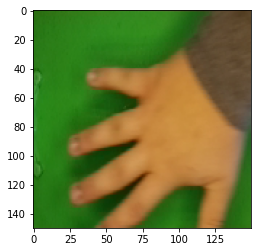

In [ ]:
# Upload File ke google colabs
uploaded = files.upload()

# pengkondisian
for file_upload in uploaded.keys():

  path = file_upload
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Membuat numpy vstack array untuk hasil prediksi 
  images = np.vstack([x])
  classes = Model.predict(images, batch_size=16)
  
  print("\n")
  print('Hasil Prediksi : ',classes[0],'\n')

# Pengkondisian 
# Ketika array ke 0 = 1 maka tergolong Paper
# Ketika array ke 1 = 1 maka tergolong Rock
# Ketika array ke 2 = 1 maka tergolong Scissors
  if classes[0][0] == 1:
    print('Kategori Gambar : Paper')
  elif classes[0][1] == 1:
    print('Kategori Gambar : Rock')
  else:
    print('Kategori Gambar : Scissor')